20186663 소프트웨어학부 전찬웅

1. Plot the training data

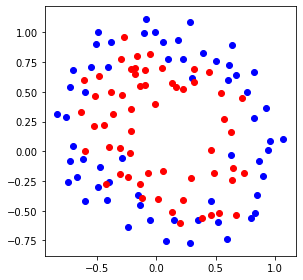

In [139]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


2. Write down the high dimensional function g(x,y;theta)

#### $$g(x,y;\theta )=\theta_{0}+\theta_{1}x+\theta_{2}y+\theta_{3}x^2+\theta_{4}xy+\theta_{5}y^2+\theta_{6}x^3+\theta_{7}x^2y+\theta_{8}xy^2+\theta_{9}y^3+\theta_{10}x^4+\theta_{11}x^3y+\theta_{12}x^2y^2+\theta_{13}xy^3+\theta_{14}y^4$$

3. Plot the training error

In [214]:
theta = np.random.randn(1,15)
xy = np.array([1, pointX[0], pointY[0], pointX[0]**2, pointX[0]*pointY[0], pointY[0]**2,pointX[0]**3,pointX[0]**2*pointY[0],pointX[0]*pointY[0]**2,pointY[0]**3, pointX[0]**4,pointX[0]**3*pointY[0],pointX[0]**2*pointY[0]**2,pointX[0]*pointY[0]**3,pointY[0]**4])
for i in range(len(pointX)-1):
    xy = np.vstack([xy,np.array([1, pointX[i+1], pointY[i+1], pointX[i+1]**2, pointX[i+1]*pointY[i+1], pointY[i+1]**2,pointX[i+1]**3,pointX[i+1]**2*pointY[i+1], pointX[i+1]*pointY[i+1]**2, pointY[i+1]**3, pointX[i+1]**4,pointX[i+1]**3*pointY[i+1],pointX[i+1]**2*pointY[i+1]**2,pointX[i+1]*pointY[i+1]**3,pointY[i+1]**4])])
learning_rate = 0.001
print(np.shape(theta))
print(np.shape(xy))

(1, 15)
(118, 15)


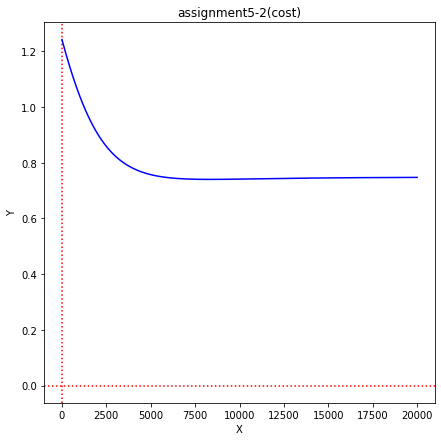

In [215]:
cost_ = []
accuracy_ = []
for i in range(20000):
    a=0
    g_function = np.dot(theta,xy.T)
    sigmoid_g = 1/(1+np.exp(-g_function))
    for j in range(len(pointX)):
        if label[j]== 1:
            if sigmoid_g[0,j]>0.5:
                a += 1
        else:
            if sigmoid_g[0,j]<0.5:
                a += 1
    accuracy_.append(a*100/len(pointX))
    cost = np.sum(-label*np.log(sigmoid_g)-(1-label)*np.log(1-sigmoid_g))/len(pointX)
    cost_.append(cost)
    for j in range(15):
        theta[0,j] = theta[0,j]-learning_rate*np.sum((sigmoid_g-label)*xy[0,j])/len(pointX)
plt.figure(figsize=(7, 7))
plt.axvline(x=0, color = 'r',linestyle=':')
plt.axhline(y=0, color = 'r',linestyle=':')
plt.title("assignment5-2(cost)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(20000),cost_,color='b')
plt.show()

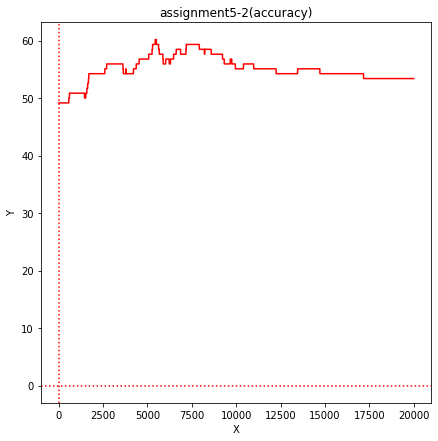

In [216]:
plt.figure(figsize=(7, 7))
plt.axvline(x=0, color = 'r',linestyle=':')
plt.axhline(y=0, color = 'r',linestyle=':')
plt.title("assignment5-2(accuracy)")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(range(20000),accuracy_,color='r')
plt.show()

In [200]:
print(accuracy_)

[52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288135593, 52.54237288

In [217]:
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [219]:
sigmoid_g

array([[0.31669549, 0.331126  , 0.32188491, 0.55259148, 0.61746157,
        0.74435774, 0.72779652, 0.70685945, 0.61437652, 0.58193833,
        0.53131035, 0.52906699, 0.54329932, 0.54652204, 0.44213285,
        0.40983897, 0.44826555, 0.17920042, 0.31287939, 0.41540523,
        0.48828531, 0.73633849, 0.79459103, 0.74557466, 0.65049952,
        0.55488874, 0.52941402, 0.5288557 , 0.47503869, 0.20256852,
        0.03836486, 0.18564206, 0.37493072, 0.55671281, 0.66331482,
        0.69636041, 0.68523019, 0.63341925, 0.60064749, 0.56889396,
        0.5594209 , 0.54081083, 0.53739326, 0.53147266, 0.50903746,
        0.49667477, 0.44556738, 0.45171862, 0.34435088, 0.32735586,
        0.42606253, 0.54268033, 0.46345405, 0.6040818 , 0.65212461,
        0.71467808, 0.67349642, 0.65643692, 0.0925484 , 0.240286  ,
        0.38602084, 0.2725289 , 0.29665946, 0.38638   , 0.42172364,
        0.46236493, 0.48604592, 0.53305415, 0.5447928 , 0.55000682,
        0.57147366, 0.57089579, 0.55029115, 0.53